# Bitcoin Price Prediction

### Introdução<br>

#### O objetivo desse projeto e prever futuros valores para o Bitcoin seguindo principalmente os valores das seguintes variaveis de instantes anteriores. As quais foram escolhidas por possuirem uma alta correlacao com o "market_price_2", que é a nossa variavel de interesse<br>

-cost_per_transaction_percent<br>
-difficulty<br>
-hash_rate<br>
-market_cap<br>
-estimated_transaction_volume_usd<br>

In [13]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
dfs = pd.read_excel('DataFrame_bitcoin.xlsx')

In [15]:
dfs.head()

,Date,avg_block_size,cost_per_transaction_percent,cost_per_transaction,difficulty,estimated_transaction_volume_usd,hash_rate,market_cap,market_price_2,miners_revenue,n_transactions_excluding_popular,n_transactions,output_volume,total_bitcoins,transaction_fees
0,2009-01-03 00:00:00,0.000285,0.000000,0.0,1.0,0.0,4.971027e-08,0.0,0.0,0.0,1,1,50.0,50.0,0.0
1,2009-01-06 00:00:00,0.000000,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0,0,0.0,50.0,0.0
2,2009-01-09 00:00:00,0.000215,0.000000,0.0,1.0,0.0,6.959438e-07,0.0,0.0,0.0,14,14,700.0,750.0,0.0
3,2009-01-12 00:00:00,0.000232,18541.666667,0.0,1.0,0.0,4.424214e-06,0.0,0.0,0.0,95,95,4601.0,12050.0,0.0
4,2009-01-15 00:00:00,0.000242,1533.816425,0.0,1.0,0.0,6.313204e-06,0.0,0.0,0.0,136,136,6911.0,30450.0,0.0


### Análise exploratória

In [16]:
tabela_corr = dfs.corr()
tabela_corr

,avg_block_size,cost_per_transaction_percent,cost_per_transaction,difficulty,estimated_transaction_volume_usd,hash_rate,market_cap,market_price_2,miners_revenue,n_transactions_excluding_popular,n_transactions,output_volume,total_bitcoins,transaction_fees
avg_block_size,1.000000,-0.051597,0.529394,0.636240,0.661933,0.626424,0.702011,0.702377,0.665177,0.971450,0.972875,0.259226,0.853095,0.515961
cost_per_transaction_percent,-0.051597,1.000000,-0.038664,-0.023245,-0.025296,-0.023179,-0.027506,-0.028073,-0.028579,-0.048561,-0.051035,-0.033656,-0.091230,-0.025885
cost_per_transaction,0.529394,-0.038664,1.000000,0.559057,0.738785,0.569977,0.857025,0.867885,0.881768,0.494602,0.500931,0.033923,0.550975,0.402727
difficulty,0.636240,-0.023245,0.559057,1.000000,0.530863,0.992881,0.786755,0.769127,0.684650,0.628557,0.637798,0.022962,0.503553,0.073641
estimated_transaction_volume_usd,0.661933,-0.025296,0.738785,0.530863,1.000000,0.531814,0.876827,0.884338,0.911858,0.661108,0.670106,0.138356,0.492783,0.682271
hash_rate,0.626424,-0.023179,0.569977,0.992881,0.531814,1.000000,0.789750,0.772287,0.698649,0.631557,0.640881,0.020669,0.502001,0.077810
market_cap,0.702011,-0.027506,0.857025,0.786755,0.876827,0.789750,1.000000,0.999379,0.976817,0.683876,0.693548,0.082127,0.556133,0.472432
market_price_2,0.702377,-0.028073,0.867885,0.769127,0.884338,0.772287,0.999379,1.000000,0.980881,0.683373,0.692805,0.084028,0.560533,0.487465
miners_revenue,0.665177,-0.028579,0.881768,0.684650,0.911858,0.698649,0.976817,0.980881,1.000000,0.666400,0.676036,0.091096,0.545469,0.564392
n_transactions_excluding_popular,0.971450,-0.048561,0.494602,0.628557,0.661108,0.631557,0.683876,0.683373,0.666400,1.000000,0.995444,0.259574,0.823252,0.540150


In [17]:
def correlation_heatmap(df, title, absolute_bounds=True):
    '''Plot a correlation heatmap for the entire dataframe'''
    heatmap = go.Heatmap(
        z=df.corr(method='pearson').values,
        x=df.columns,
        y=df.columns,
        colorbar=dict(title='Pearson Coefficient'),
    )
    
    layout = go.Layout(title=title)
    
    if absolute_bounds:
        heatmap['zmax'] = 1.0
        heatmap['zmin'] = -1.0
        
    fig = go.Figure(data=[heatmap], layout=layout)
    py.iplot(fig)

In [18]:
correlation_heatmap(dfs, 'Correlação das variávies')

### Como podemos ver as variáveis que apresentam a correlação mais forte com o market price (preço) são:  
-Custo Por Transação Em Porcentagem  (miners revenue as percentage of the transaction volume.)<br>
-Dificuldade  
-Hash_rate<br>
-Market_Cap<br>
-Volumne Estimado Da Transacao<br>
#### Agora vamos analisar mais a fundo essas relações

Text(0, 0.5, 'Custo percentual de transação')

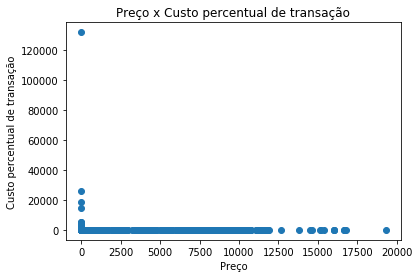

In [19]:
plt.scatter(dfs["market_price_2"],dfs["cost_per_transaction_percent"])
plt.title('Preço x Custo percentual de transação')
plt.xlabel('Preço')
plt.ylabel('Custo percentual de transação')

Text(0, 0.5, 'Dificuladade')

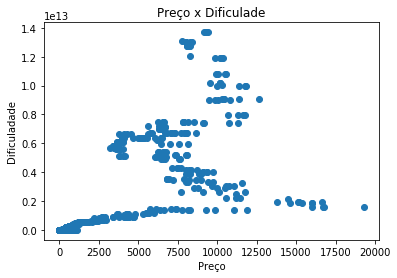

In [20]:
plt.scatter(dfs["market_price_2"],dfs["difficulty"])
plt.title('Preço x Dificulade')
plt.xlabel('Preço')
plt.ylabel('Dificuladade')

Text(0, 0.5, 'Hash Rate')

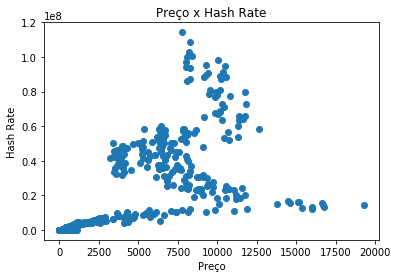

In [11]:
plt.scatter(dfs["market_price_2"],dfs["hash_rate"])
plt.title('Preço x Hash Rate')
plt.xlabel('Preço')
plt.ylabel('Hash Rate')

Text(0, 0.5, 'Market_Cap')

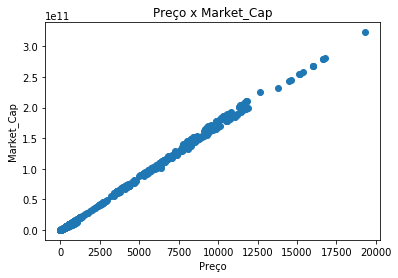

In [22]:
plt.scatter(dfs["market_price_2"],dfs["market_cap"])
plt.title('Preço x Market_Cap')
plt.xlabel('Preço')
plt.ylabel('Market_Cap')

Text(0, 0.5, 'Volumne Estimado Da Transacao')

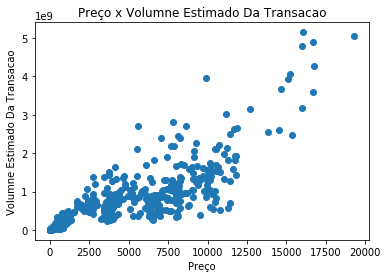

In [23]:
plt.scatter(dfs["market_price_2"],dfs["estimated_transaction_volume_usd"])
plt.title('Preço x Volumne Estimado Da Transacao')
plt.xlabel('Preço')
plt.ylabel('Volumne Estimado Da Transacao')

In [12]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results
Y = dfs['market_price_2']
X = dfs[['avg_block_size',
 'cost_per_transaction_percent',
 'cost_per_transaction',
 'difficulty',
 'estimated_transaction_volume_usd',
 'hash_rate',
 'market_cap',
 'miners_revenue',
 'n_transactions_excluding_popular',
 'n_transactions',
 'output_volume',
 'total_bitcoins',
 'transaction_fees']]
results = regress(X,Y)
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         market_price_2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.008e+05
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:24:50   Log-Likelihood:                -6923.7
No. Observations:                1320   AIC:                         1.388e+04
Df Residuals:                    1306   BIC:                         1.395e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -7.2776      3.605     -2.019      0.044     -14.350      -0.206
avg_block_size                      89.1866     19.040      4.684      0.000      51.835     126.539
cost_per_transaction_percent         0.0001      0.000      0.322      0.747      -0.001       0.001
cost_per_transaction                 3.9838      0.151     26.350      0.000       3.687       4.280
difficulty                        -2.86e-12   5.21e-12     -0.549      0.583   -1.31e-11    7.37e-12
estimated_transaction_volume_usd  4.534e-08   6.64e-09      6.830      0.000    3.23e-08    5.84e-08
hash_rate                        -4.749e-06   6.98e-07     -6.806      0.000   -6.12e-06   -3.38e-06
market_cap                        5.594e-08   2.08e-10    269.391      0.000    5.55e-08    5.63e-08
miners_revenue                    6.743e-06   1.76e-06      3.821      0.000    3.28e-06    1.02e-05
n_transactions_excluding_popular     0.0001      0.000      1.068      0.286      -0.000       0.000
n_transactions                      -0.0001      0.000     -0.894      0.372      -0.000       0.000
output_volume                    -1.774e-06   6.73e-07     -2.635      0.009    -3.1e-06   -4.53e-07
total_bitcoins                   -7.345e-07   6.09e-07     -1.206      0.228   -1.93e-06     4.6e-07
transaction_fees                     0.0251      0.023      1.072      0.284      -0.021       0.071
==============================================================================
Omnibus:                      442.042   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23901.828
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                      23.794   Cond. No.                     4.37e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""